## Data Exploration

In [ ]:
# Total number of clases and images
import os
folder_path = 'TomatoDiseaseClassification/TomatoDiseaseCleaned'
total_images = 0
total_classes = 0

for root, dirs, files in os.walk(folder_path):
    if root == folder_path:
        total_classes = len(dirs)

    else:
        total_images += len(files)

print(f"Total classes: {total_classes}")
print(f"Total images: {total_images}")

Total classes: 10
Total images: 16012


In [ ]:
# Number of images per class
import os
import pandas as pd

class_counts = {}

for root, dirs, files in os.walk(folder_path):
    if root == folder_path:
        total_classes = len(dirs)
        class_names = dirs
        class_counts = {class_name: 0 for class_name in class_names}

    else:
        class_name = os.path.basename(root)
        num_files = len(files)
        class_counts[class_name] = num_files
        total_images += num_files

# Convert the class counts dictionary to a pandas DataFrame
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Class Name', 'No of Files'])

# Print the DataFrame as a formatted table
print(df_class_counts.to_string(index=False))

                                 Class Name  No of Files
                      Tomato_Bacterial_spot         2127
                        Tomato_Early_blight         1000
                             Tomato_healthy         1591
                         Tomato_Late_blight         1909
                           Tomato_Leaf_Mold          952
                  Tomato_Septoria_leaf_spot         1771
Tomato_Spider_mites_Two_spotted_spider_mite         1676
                        Tomato__Target_Spot         1404
                Tomato__Tomato_mosaic_virus          373
      Tomato__Tomato_YellowLeaf__Curl_Virus         3209


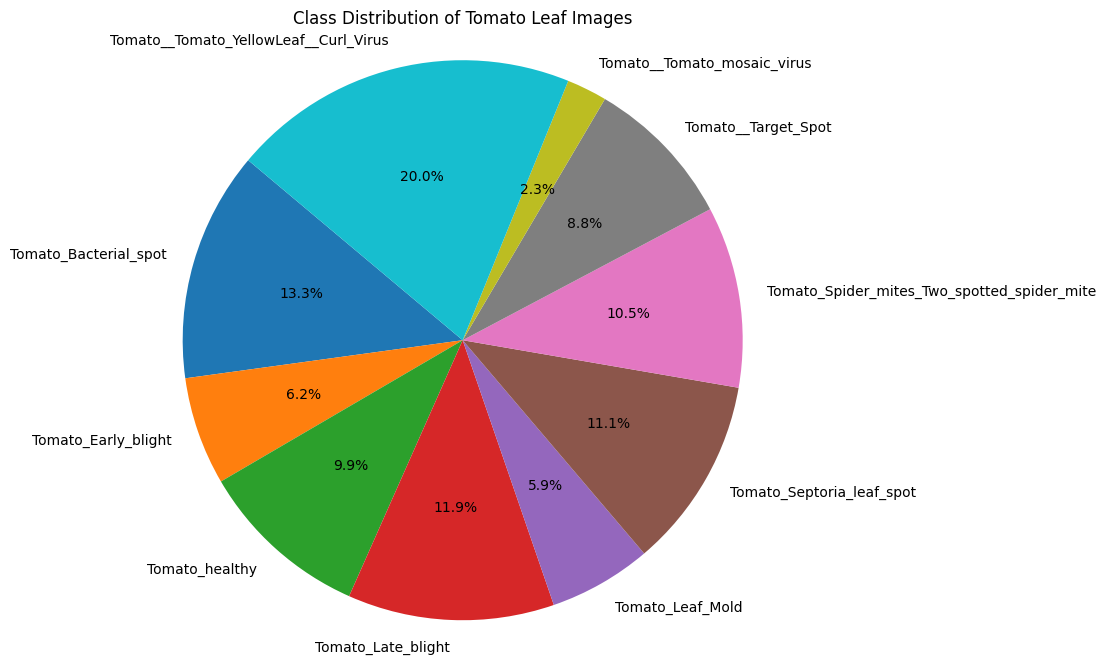

In [ ]:
# Pie Chart of class distribution
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 

# Plot a pie chart of the class distribution
plt.figure(figsize=(10, 8))
plt.pie(df_class_counts['No of Files'], labels=df_class_counts['Class Name'], autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution of Tomato Leaf Images')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Pixel of Images
import os
from collections import defaultdict
from PIL import Image

def count_image_sizes(directory):
    size_count = defaultdict(int) 
    for root, dirs, files in os.walk(directory):
        for filename in files:
            ext = os.path.splitext(filename)[1].lower()
            if ext in ['.jpg', '.jpeg']:  
                filepath = os.path.join(root, filename)
                with Image.open(filepath) as img:
                    size = img.size
                    size_count[size] += 1

    return size_count

image_sizes = count_image_sizes(folder_path)
for size, count in image_sizes.items():
    print(f"Size: {size[0]}x{size[1]}px")

Size: 256x256px


In [ ]:
# Image File Type
import os

def count_image_types(directory):
    image_types = {}
    for root, dirs, files in os.walk(directory):
        for filename in files:
            ext = os.path.splitext(filename)[1].lower()
            if ext in ['.jpg', '.jpeg', '.png', '.gif']:
                if ext in image_types:
                    image_types[ext] += 1
                else:
                    image_types[ext] = 1

    return image_types

image_types = count_image_types(folder_path)

if image_types:
    for ext, count in image_types.items():
        print(f"There are {count} images with the {ext} extension.")

else:
    print("No recognized image files found.")

There are 16010 images with the .jpg extension.
There are 1 images with the .jpeg extension.


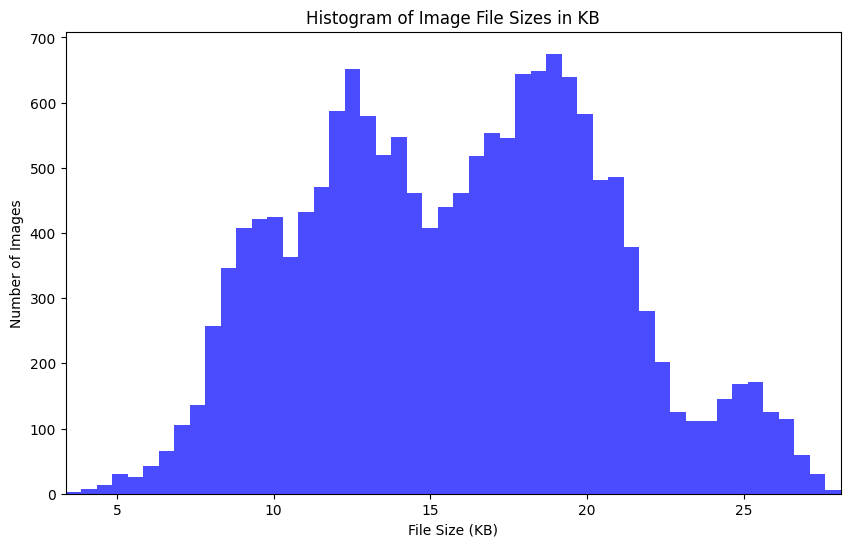

In [ ]:
# Histogram of Image File Sizes
import os
import matplotlib.pyplot as plt

def get_image_file_sizes(directory):
    file_sizes = []
    for root, dirs, files in os.walk(directory):
        for filename in files:
            ext = os.path.splitext(filename)[1].lower()
            if ext in ['.jpg', '.jpeg']:
                filepath = os.path.join(root, filename)
                file_size_kb = os.path.getsize(filepath) / 1024 
                file_sizes.append(file_size_kb)
    return file_sizes

file_sizes = get_image_file_sizes(folder_path)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(file_sizes, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Image File Sizes in KB')
plt.xlabel('File Size (KB)')
plt.ylabel('Number of Images')
plt.xlim([min(file_sizes), max(file_sizes)])  
plt.grid(False) 
plt.show()

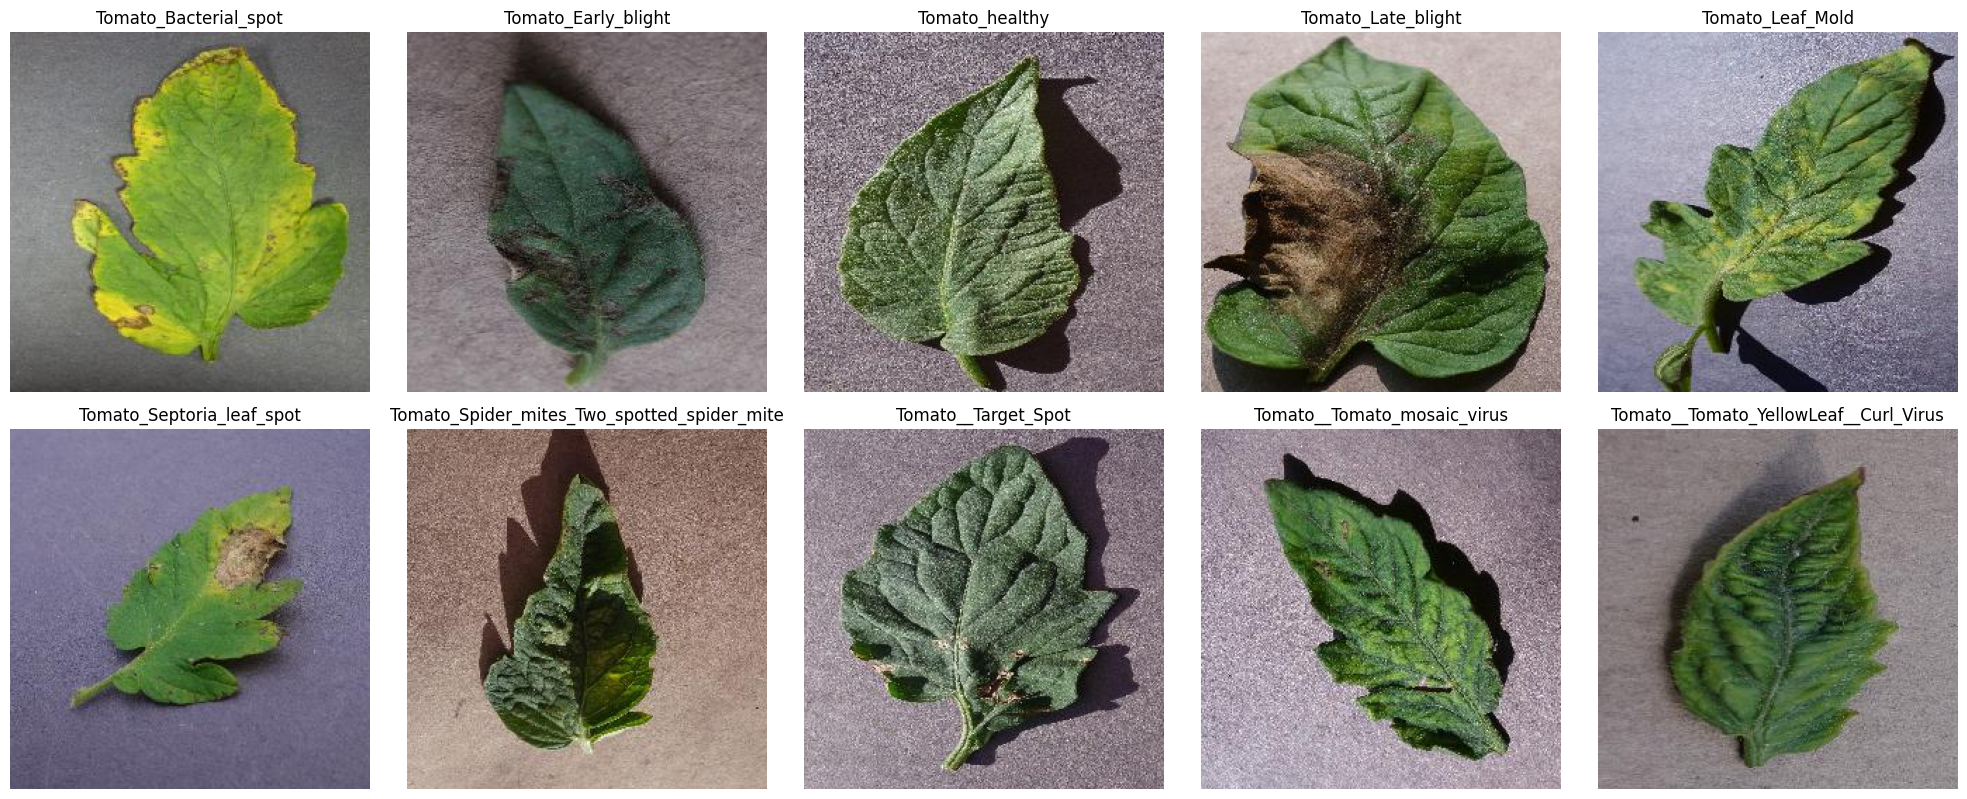

In [ ]:
# Sample images from each class

import os
import random
import cv2
import matplotlib.pyplot as plt

class_dirs = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
selected_images = []
class_names = []

for class_dir in class_dirs:
    class_path = os.path.join(folder_path, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        class_names.append(class_dir)

    else:
        print(f"No images found in class directory: {class_dir}")


plt.figure(figsize=(20, 20))
for idx, (image_path, class_name) in enumerate(zip(selected_images, class_names)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    plt.subplot(5, 5, idx+1) 
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf

BATCH_SIZE = 32
IMAGE_SIZE = 256

folder_path = r'C:\Users\Renee\Documents\TomatoDisease'

#count total files
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    folder_path,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


In [ ]:
# Image shape

for images, labels in dataset.take(1):
    print(images.shape)

(32, 256, 256, 3)


In [ ]:
import os
import shutil

# Directories
dataset_dir = 'TomatoDisease/'
cleaned_dir = 'TomatoDiseaseCleaned/'

# Copy the dataset directory to a new location
if not os.path.exists(cleaned_dir):
    shutil.copytree(dataset_dir, cleaned_dir)

Reading images from c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/16011 [00:00<?, ?it/s]

  0%|          | 0/16011 [00:00<?, ?it/s]

Issue checks completed. 37 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | exact_duplicates |           28 |
|  1 | blurry           |            7 |
|  2 | low_information  |            2 |
|  3 | dark             |            0 |
|  4 | light            |            0 |
|  5 | odd_aspect_ratio |            0 |
|  6 | grayscale        |            0 |
|  7 | odd_size         |            0 |
|  8 | near_duplicates  |            0 | 

----------------- exact_duplicates images ------------------

Number of examples with this issue: 28
Examples representing most severe instances of this issue:

Set: 0


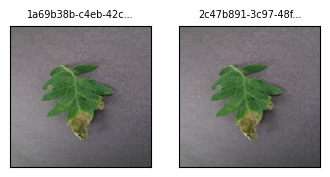

Set: 1


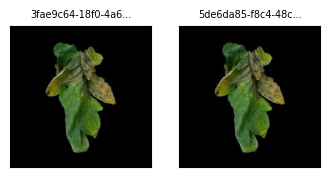

Set: 2


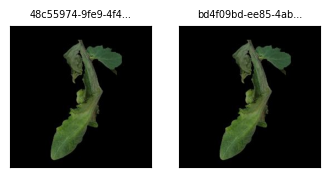

Set: 3


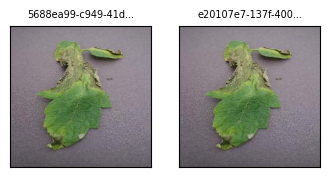

---------------------- blurry images -----------------------

Number of examples with this issue: 7
Examples representing most severe instances of this issue:



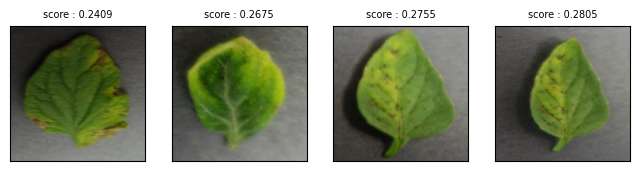

------------------ low_information images ------------------

Number of examples with this issue: 2
Examples representing most severe instances of this issue:



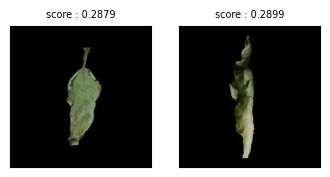

In [ ]:
# Assess Image Quality
from cleanvision import Imagelab

# Define the folder path
folder_path = 'TomatoDiseaseCleaned/'

# Initialize Imagelab
imagelab = Imagelab(data_path=folder_path)

# Find issues in the images
imagelab.find_issues()

# Generate a report of the issues
imagelab.report()

## Data Preprocessing

In [ ]:
# Identify duplicated image pathway
duplicated_sets= imagelab.info["exact_duplicates"]["sets"]
duplicated_sets

[['c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/1a69b38b-c4eb-42c4-9584-bcb14fb8db0c___GHLB2 Leaf 9011.JPG',
  'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/2c47b891-3c97-48f1-a2cc-5aa53d3a1148___GHLB2 Leaf 9011.JPG'],
 ['c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/3fae9c64-18f0-4a67-9f97-554248bb1bed___GHLB_PS Leaf 24 Day 16.jpg',
  'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/5de6da85-f8c4-48c4-b463-3e6bd78884cc___GHLB_PS Leaf 24 Day 16.jpg'],
 ['c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/48c55974-9fe9-4f4b-94f7-c8cd127d1e05___GHLB_PS Leaf 23.7 Day 13.jpg',
  'c:/Users/Ren

In [ ]:
# Remain only one image from duplicated set
duplicated_files = [set[0] for set in duplicated_sets]
duplicated_files

['c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/1a69b38b-c4eb-42c4-9584-bcb14fb8db0c___GHLB2 Leaf 9011.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/3fae9c64-18f0-4a67-9f97-554248bb1bed___GHLB_PS Leaf 24 Day 16.jpg',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/48c55974-9fe9-4f4b-94f7-c8cd127d1e05___GHLB_PS Leaf 23.7 Day 13.jpg',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/5688ea99-c949-41d0-bbab-9cbf0ffb8bcd___GHLB2 Leaf 8677.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/5f21282c-e2ef-4c4a-ace1-b5701fe7effc___GHLB2 Leaf 8999.JPG',
 'c:/Users/Renee/OneDrive - A

In [ ]:
# Identify blurry image pathway

blurry_images = imagelab.issues[imagelab.issues["is_blurry_issue"] == True].sort_values(by=["blurry_score"])
blurry_image_files = blurry_images.index.tolist()
blurry_image_files

['c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/6c0da973-414f-473f-8cb4-f280b39abb74___UF.GRC_YLCV_Lab 08524.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/02cb40d6-550a-42fb-99ce-247e4406a322___UF.GRC_YLCV_Lab 02991.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/6f407e70-a20b-4efa-a156-13dd33eaf0ec___UF.GRC_YLCV_Lab 08427.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/63476e74-7aae-4e1c-b550-89e4be34149f___UF.GRC_YLCV_Lab 08428.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Bacterial_spot/ad6

In [ ]:
# Identify low information image pathway
low_information = imagelab.issues[imagelab.issues["is_low_information_issue"] == True]
low_information_files = low_information.index.tolist()
low_information_files

['c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/7b343a4c-5fbc-40f6-83da-ccae49ebd5fb___GHLB_PS Leaf 35 Day 13.jpg',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/ed974f5b-e999-46a9-9e22-da51da2766b6___GHLB_PS Leaf 8 Day 16.jpg']

In [ ]:
# Identify all files pathway to remove
files_to_remove = low_information_files+blurry_image_files+duplicated_files
files_to_remove

['c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/7b343a4c-5fbc-40f6-83da-ccae49ebd5fb___GHLB_PS Leaf 35 Day 13.jpg',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/ed974f5b-e999-46a9-9e22-da51da2766b6___GHLB_PS Leaf 8 Day 16.jpg',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/6c0da973-414f-473f-8cb4-f280b39abb74___UF.GRC_YLCV_Lab 08524.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/02cb40d6-550a-42fb-99ce-247e4406a322___UF.GRC_YLCV_Lab 02991.JPG',
 'c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/6f407e70-a20b-4efa-a156-

In [ ]:
# Remove file
import os

# Remove the files in the cleaned directory
for file_path in files_to_remove:
    cleaned_file_path = os.path.join(cleaned_dir, file_path)
    if os.path.exists(cleaned_file_path):
        os.remove(cleaned_file_path)
        print(f"Removed: {cleaned_file_path}")
    else:
        print(f"File not found: {cleaned_file_path}")

print("Cleaning complete.")

Removed: c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/7b343a4c-5fbc-40f6-83da-ccae49ebd5fb___GHLB_PS Leaf 35 Day 13.jpg
Removed: c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato_Late_blight/ed974f5b-e999-46a9-9e22-da51da2766b6___GHLB_PS Leaf 8 Day 16.jpg
Removed: c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/6c0da973-414f-473f-8cb4-f280b39abb74___UF.GRC_YLCV_Lab 08524.JPG
Removed: c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Virus/02cb40d6-550a-42fb-99ce-247e4406a322___UF.GRC_YLCV_Lab 02991.JPG
Removed: c:/Users/Renee/OneDrive - Asia Pacific University/Documents/TomatoDiseaseClassification/TomatoDiseaseCleaned/Tomato__Tomato_YellowLeaf__Curl_Vir

In [ ]:
import os
import pandas as pd

class_counts = {}
cleaned_dir = 'TomatoDiseaseCleaned/'

for root, dirs, files in os.walk(cleaned_dir):
    if root == cleaned_dir:
        total_classes = len(dirs)
        class_names = dirs
        class_counts = {class_name: 0 for class_name in class_names}
    else:
        class_name = os.path.basename(root)
        num_files = len(files)
        class_counts[class_name] = num_files
        total_images += num_files

# Convert the class counts dictionary to a pandas DataFrame
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Class Name', 'No of Files'])

# Print the DataFrame as a formatted table
print(df_class_counts.to_string(index=False))

                                 Class Name  No of Files
                      Tomato_Bacterial_spot         2126
                        Tomato_Early_blight         1000
                             Tomato_healthy         1585
                         Tomato_Late_blight         1899
                           Tomato_Leaf_Mold          952
                  Tomato_Septoria_leaf_spot         1771
Tomato_Spider_mites_Two_spotted_spider_mite         1676
                        Tomato__Target_Spot         1404
                Tomato__Tomato_mosaic_virus          373
      Tomato__Tomato_YellowLeaf__Curl_Virus         3203


In [ ]:
import splitfolders
import os

# Define the directory with the dataset
dataset_dir = 'TomatoDiseaseCleaned/'

# Create output directory
output_dir = 'TomatoDiseaseCleanedSplit/'

# Create the output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Split with a ratio
splitfolders.ratio(dataset_dir, output=output_dir, seed=1337, ratio=(.8, .1, .1))

Copying files: 15989 files [00:54, 295.20 files/s]


In [ ]:
import os
import pandas as pd

train_dir = 'TomatoDiseaseSplit/train'
class_names = os.listdir(train_dir)

class_counts = {class_name: 0 for class_name in class_names}

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        file_count = len(os.listdir(class_path))
        class_counts[class_name] = file_count

df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Class Name', 'No of Files'])
print(df_class_counts.to_string(index=False))

                                 Class Name  No of Files
                      Tomato_Bacterial_spot         1700
                        Tomato_Early_blight          800
                             Tomato_healthy         1268
                         Tomato_Late_blight         1519
                           Tomato_Leaf_Mold          761
                  Tomato_Septoria_leaf_spot         1416
Tomato_Spider_mites_Two_spotted_spider_mite         1340
                        Tomato__Target_Spot         1123
                Tomato__Tomato_mosaic_virus          298
      Tomato__Tomato_YellowLeaf__Curl_Virus         2562


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import random
import pandas as pd

# Initialize class counts dictionary
class_counts = {}

# Set threshold
threshold = 1000

# Data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Loop through each class directory
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        # Count the number of images in the class
        image_files = os.listdir(class_path)
        file_count = len(image_files)

        # Oversampling - Data augmentation
        if file_count < threshold:
            images_needed = threshold - file_count
            augmented_count = 0
            print(f"Oversampling class '{class_name}' (currently {file_count} images, need {images_needed} more)")
            while augmented_count < images_needed:
                # Randomly select an image to augment
                image_file = random.choice(image_files)
                image_path = os.path.join(class_path, image_file)
                # Load and augment the image
                img = load_img(image_path)
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)
                for batch in datagen.flow(x, batch_size=1, save_to_dir=class_path, save_prefix='aug', save_format='jpeg'):
                    augmented_count += 1
                    if augmented_count >= images_needed:
                        break

        # Undersampling - Randomly remove excess images
        elif file_count > threshold:
            images_to_remove = file_count - threshold
            image_files_to_remove = random.sample(image_files, images_to_remove)
            print(f"Undersampling class '{class_name}' (currently {file_count} images, removing {images_to_remove})")
            for image_file in image_files_to_remove:
                image_path = os.path.join(class_path, image_file)
                os.remove(image_path)

# Show the number of images in each class after balancing
class_counts = {class_name: len(os.listdir(os.path.join(train_dir, class_name))) for class_name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, class_name))}

# Convert the class counts to a DataFrame for easier viewing
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Class Name', 'No of Files'])
print("Number of Files for Each Class After Data Balancing:")
print(df_class_counts.to_string(index=False))


Undersampling class 'Tomato_Bacterial_spot' (currently 1700 images, removing 700)
Oversampling class 'Tomato_Early_blight' (currently 800 images, need 200 more)
Undersampling class 'Tomato_healthy' (currently 1268 images, removing 268)
Undersampling class 'Tomato_Late_blight' (currently 1519 images, removing 519)
Oversampling class 'Tomato_Leaf_Mold' (currently 761 images, need 239 more)
Undersampling class 'Tomato_Septoria_leaf_spot' (currently 1416 images, removing 416)
Undersampling class 'Tomato_Spider_mites_Two_spotted_spider_mite' (currently 1340 images, removing 340)
Undersampling class 'Tomato__Target_Spot' (currently 1123 images, removing 123)
Oversampling class 'Tomato__Tomato_mosaic_virus' (currently 298 images, need 702 more)
Undersampling class 'Tomato__Tomato_YellowLeaf__Curl_Virus' (currently 2562 images, removing 1562)
Number of Files for Each Class After Data Balancing:
                                 Class Name  No of Files
                      Tomato_Bacterial_spot

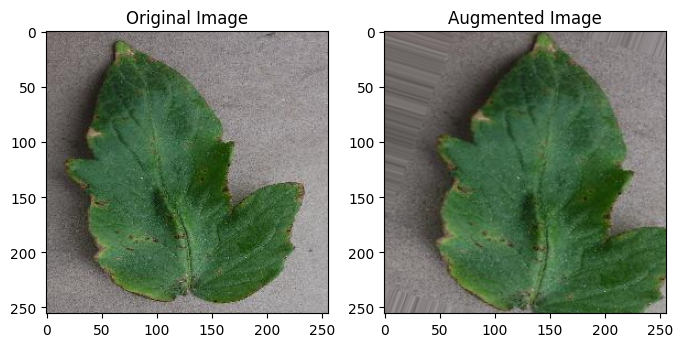

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import random
import pandas as pd

# Initialize class counts dictionary
class_counts = {}

# Set threshold
threshold = 1000

# Data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Loop through each class directory
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        # Count the number of images in the class
        image_files = os.listdir(class_path)
        file_count = len(image_files)

        # Oversampling - Data augmentation
        if file_count < threshold:
            images_needed = threshold - file_count
            augmented_count = 0
            print(f"Oversampling class '{class_name}' (currently {file_count} images, need {images_needed} more)")
            while augmented_count < images_needed:
                # Randomly select an image to augment
                image_file = random.choice(image_files)
                image_path = os.path.join(class_path, image_file)
                # Load and augment the image
                img = load_img(image_path)
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)
                for batch in datagen.flow(x, batch_size=1, save_to_dir=class_path, save_prefix='aug', save_format='jpeg'):
                    augmented_count += 1
                    if augmented_count >= images_needed:
                        break

        # Undersampling - Randomly remove excess images
        elif file_count > threshold:
            images_to_remove = file_count - threshold
            image_files_to_remove = random.sample(image_files, images_to_remove)
            print(f"Undersampling class '{class_name}' (currently {file_count} images, removing {images_to_remove})")
            for image_file in image_files_to_remove:
                image_path = os.path.join(class_path, image_file)
                os.remove(image_path)

# Show the number of images in each class after balancing
class_counts = {class_name: len(os.listdir(os.path.join(train_dir, class_name))) for class_name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, class_name))}

# Convert the class counts to a DataFrame for easier viewing
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Class Name', 'No of Files'])
print("Number of Files for Each Class After Data Balancing:")
print(df_class_counts.to_string(index=False))

## Data Loading

In [ ]:
# Load Dataset
import tensorflow as tf

# Balance
train_dir = '/kaggle/input/tomatodiseasedataset/TomatoDiseaseSplit/train'
val_dir = '/kaggle/input/tomatodiseasedataset/TomatoDiseaseSplit/val'
test_dir = '/kaggle/input/tomatodiseasedataset/TomatoDiseaseSplit/test'

# Define parameters
BATCH_SIZE = 32
IMG_SIZE = (256, 256)  # Image dimensions

# Load the train dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                    shuffle=True,
                                                                    batch_size=BATCH_SIZE,
                                                                    image_size=IMG_SIZE)



# Load the validation dataset
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                                  shuffle=True,
                                                                  batch_size=BATCH_SIZE,
                                                                  image_size=IMG_SIZE)


# Load the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                   shuffle=False,
                                                                   batch_size=BATCH_SIZE,
                                                                   image_size=IMG_SIZE)

Found 9973 files belonging to 10 classes.
Found 1595 files belonging to 10 classes.
Found 1607 files belonging to 10 classes.


In [ ]:
# Print class names
class_names = train_dataset.class_names
print("Class names:", class_names)

Class names: ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [ ]:
# Define normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Apply normalization to each dataset
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# Apply prefetching
AUTOTUNE = tf.data.AUTOTUNE  # Automatically determine the optimal buffer size

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Define input shape, number of classes and batch size
input_shape = (256, 256, 3)
num_classes = 10  
batch_size = 32

## Model 1：CNN

### Base Model



- 5 convolutional layers, follow by 5 max pooling layers

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Function to build the Tomato Disease CNN
def build_tomato_disease_cnn(input_shape, num_classes):
    model = models.Sequential([
        # Input Layer
        layers.Input(shape=input_shape),
        
        # First Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # Second Convolutional Layer
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # Third Convolutional Layer
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # Fourth Convolutional Layer
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # Fifth Convolutional Layer
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # Flatten the Output
        layers.Flatten(),
        
        # Dropout Layer (50%)
        layers.Dropout(0.5),
        
        # Fully Connected Dense Layer
        layers.Dense(units=128, activation='relu'),
        
        # Dropout Layer (30%)
        layers.Dropout(0.3),
        
        # Output Layer
        layers.Dense(units=num_classes, activation='softmax')
    ])
    return model

# Example Usage
# Specify the input shape and number of classes
input_shape = (128, 128, 3)  # Adjust according to your dataset (image height, width, channels)
num_classes = 10             # Replace with the actual number of classes in your dataset

# Build the model
cnn_original_model = build_tomato_disease_cnn(input_shape, num_classes)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile the model with learning rate 0.0001
optimizer = optimizers.Adam(learning_rate=0.0001)
cnn_original_model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = cnn_original_model.fit(train_dataset, 
                          validation_data=val_dataset, 
                          epochs=30, 
                          batch_size=batch_size,
                          callbacks=[early_stopping, reduce_lr])

Epoch 1/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 66ms/step - accuracy: 0.1900 - loss: 2.1207 - val_accuracy: 0.6257 - val_loss: 1.1665 - learning_rate: 1.0000e-04
Epoch 2/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.5762 - loss: 1.2192 - val_accuracy: 0.7423 - val_loss: 0.8035 - learning_rate: 1.0000e-04
Epoch 3/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.6800 - loss: 0.9314 - val_accuracy: 0.7724 - val_loss: 0.6722 - learning_rate: 1.0000e-04
Epoch 4/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.7394 - loss: 0.7720 - val_accuracy: 0.8100 - val_loss: 0.5648 - learning_rate: 1.0000e-04
Epoch 5/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7754 - loss: 0.6591 - val_accuracy: 0.8188 - val_loss: 0.5425 - learning_rate: 1.0000e-04
Epoch 6/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7977 - loss: 0.5768 - val_accuracy: 0.8533 - val_loss: 0.4363 - learning_rate: 1.0000e-04
Epoch 7/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/ste

In [ ]:
# Display the model summary
cnn_original_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,607,008 (9.94 MB)

 Trainable params: 869,002 (3.31 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,738,006 (6.63 MB)

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn_original_model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9378 - loss: 0.1752
Test accuracy: 0.9533292055130005
Test loss: 0.1449333131313324


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate predictions for the test dataset
predictions = cnn_original_model.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1)  # Get the predicted class labels
true_classes = tf.concat([y for x, y in test_dataset], axis=0)  # True labels from the test dataset

# Calculate precision, recall, and F1-score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Precision: 0.9533391187768494
Recall: 0.9533291848164281
F1 Score: 0.9531991215471511


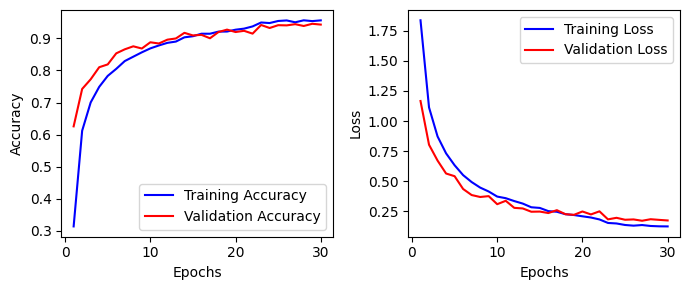

In [ ]:
import matplotlib.pyplot as plt

# Retrieve model training and validation metrics from the history object
acc2 = history.history['accuracy'] #training accuracy
val_acc = history.history['val_accuracy'] #validation accuracy
loss2 = history.history['loss'] #training loss
val_loss = history.history['val_loss'] #validation loss

# Define the range for epochs
epochs = range(1,len(acc2)+1)

# Plot training and validation accuracy on the first subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

# Plot training and validation accuracy on the first subplot
axes[0].plot(epochs, acc2, 'b', label='Training Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot training and validation loss on the second subplot
axes[1].plot(epochs, loss2, 'b', label='Training Loss')
axes[1].plot(epochs, val_loss, 'r', label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions on the test dataset
y_pred = cnn_original_model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Get true labels from test_dataset
test_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Generate classification report with meaningful class names
report = classification_report(test_labels, y_pred_classes, target_names=class_names)
print(report)

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.96      0.95      0.95       214
                        Tomato_Early_blight       0.88      0.85      0.86       100
                         Tomato_Late_blight       0.94      0.92      0.93       191
                           Tomato_Leaf_Mold       0.96      0.98      0.97        96
                  Tomato_Septoria_leaf_spot       0.95      0.95      0.95       178
Tomato_Spider_mites_Two_spotted_spider_mite       0.98      0.95      0.96       169
                        Tomato__Target_Spot       0.92      0.96      0.94       141
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.97      0.98      0.97       321
                Tomato__Tomato_mosaic_virus       0.93      1.00      0.96        38
                             Tomato_healthy       0.98      1.00      0.99       159

                       

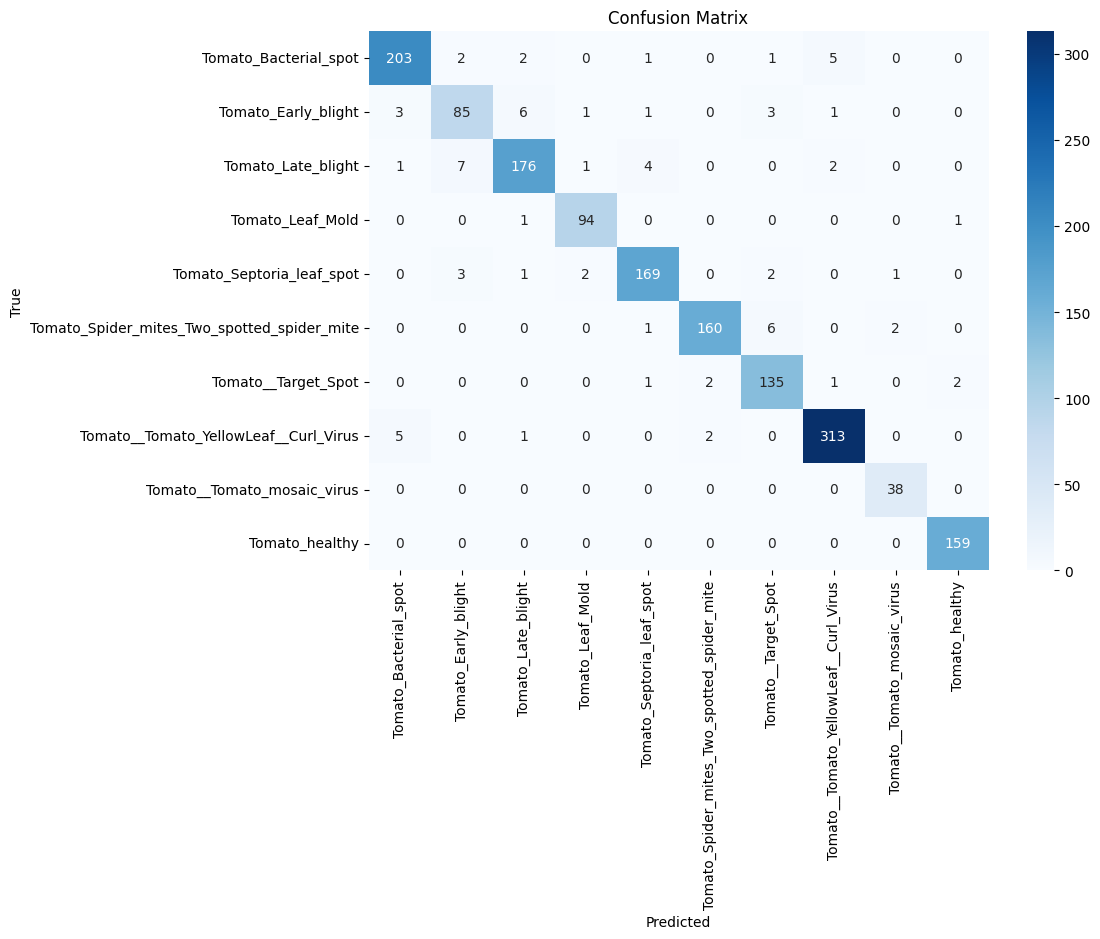

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


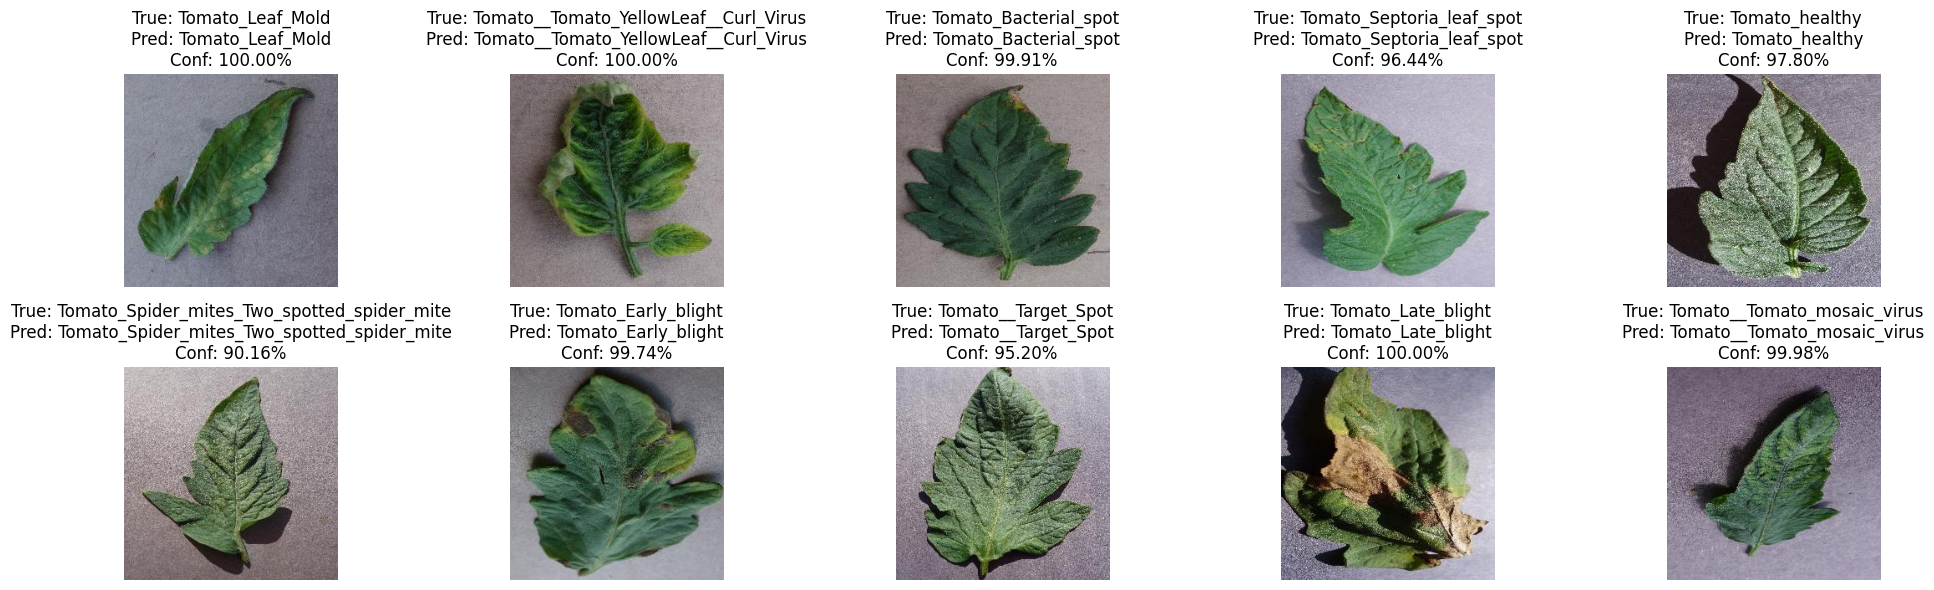

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img_size = 256,256

def sample_images_from_each_class(test_dir, img_size, num_images_per_class=1):
    selected_images = []
    class_names = os.listdir(test_dir)

    for class_name in class_names:
        class_path = os.path.join(test_dir, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            for _ in range(num_images_per_class):  # Sample a number of images per class
                random_image = random.choice(images)
                img_path = os.path.join(class_path, random_image)
                # Load the image
                img = image.load_img(img_path, target_size=img_size)
                img_array = image.img_to_array(img)
                img_array = image.img_to_array(img) / 255.0  # Normalize the image
                img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
                selected_images.append((img_path, img_array, class_name))

    return selected_images

# Use the function to sample images
sampled_images = sample_images_from_each_class(test_dir, IMG_SIZE, num_images_per_class=1)

# Set up the 2x5 grid for plotting
fig, axes = plt.subplots(2, 5, figsize=(20, 6))

for idx, (img_path, img_array, true_class_name) in enumerate(sampled_images):
    prediction = cnn_original_model.predict(img_array)
    # Get the predicted class index and confidence
    predicted_class_idx = np.argmax(prediction, axis=1)[0]  # Get the predicted class index
    predicted_class_name = class_names[predicted_class_idx]  # Get the class name for the predicted index
    confidence = np.max(prediction)  # Get the confidence score (maximum probability)

    # Plot the image
    ax = axes[idx // 5, idx % 5]
    img_to_display = image.load_img(img_path, target_size=img_size)
    ax.imshow(img_to_display)
    ax.axis('off')

    # Set title with prediction info
    ax.set_title(f"True: {true_class_name}\nPred: {predicted_class_name}\nConf: {confidence:.2%}")

# Display the plot
plt.tight_layout()
plt.show()

### Improved -- Without SE Block

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Build the improved CNN model with SE Block and other improvements (without residual connection)
def build_tomato_disease_cnn_improved(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    
    # First convolutional layer with batch normalization
    x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Second convolutional layer with batch normalization and SE block
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Third convolutional layer
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Fourth convolutional layer
    x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Fifth convolutional layer
    x = layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Global Average Pooling and Dense Layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    # Define the model
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Build the improved CNN model without residual connection
cnn_model_withoutse = build_tomato_disease_cnn_improved(input_shape, num_classes)

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.0001)
cnn_model_withoutse.compile(optimizer=optimizer, 
                              loss='sparse_categorical_crossentropy', 
                              metrics=['accuracy'])


In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


# Train the model on the dataset
history = cnn_model_withoutse.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]  
)

Epoch 1/30


I0000 00:00:1730910633.631600     110 service.cc:145] XLA service 0x7f8798003270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730910633.631657     110 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730910633.631661     110 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/312 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 0.1094 - loss: 3.1171   

I0000 00:00:1730910644.650459     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


312/312 ━━━━━━━━━━━━━━━━━━━━ 49s 108ms/step - accuracy: 0.3202 - loss: 1.9956 - val_accuracy: 0.1831 - val_loss: 2.5927 - learning_rate: 1.0000e-04
Epoch 2/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.6010 - loss: 1.2044 - val_accuracy: 0.6144 - val_loss: 1.0732 - learning_rate: 1.0000e-04
Epoch 3/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.6827 - loss: 0.9450 - val_accuracy: 0.7787 - val_loss: 0.6579 - learning_rate: 1.0000e-04
Epoch 4/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.7325 - loss: 0.7986 - val_accuracy: 0.7850 - val_loss: 0.6372 - learning_rate: 1.0000e-04
Epoch 5/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.7806 - loss: 0.6799 - val_accuracy: 0.8577 - val_loss: 0.4422 - learning_rate: 1.0000e-04
Epoch 6/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.7894 - loss: 0.6283 - val_accuracy: 0.8840 - val_loss: 0.3685 - learning_rate: 1.0000e-04
Epoch 7/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accura

In [9]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn_model_withoutse.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9721 - loss: 0.1106
Test accuracy: 0.9701306819915771
Test loss: 0.11265179514884949


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Generate predictions for the test dataset
predictions = cnn_model_withoutse.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1)  # Get the predicted class labels
true_classes = tf.concat([y for x, y in test_dataset], axis=0)  # True labels from the test dataset

# Calculate precision, recall, and F1-score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
Precision: 0.9705011932551527
Recall: 0.970130678282514
F1 Score: 0.9701609061983079


### Improved -- Add SE block

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Define the Squeeze-and-Excitation (SE) Block
class SEBlock(layers.Layer):
    def __init__(self, filters, reduction=16):
        super(SEBlock, self).__init__()
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.dense1 = layers.Dense(filters // reduction, activation='relu')
        self.dense2 = layers.Dense(filters, activation='sigmoid')

    def call(self, inputs):
        se = self.global_avg_pool(inputs)
        se = self.dense1(se)
        se = self.dense2(se)
        se = layers.Reshape((1, 1, se.shape[-1]))(se)  # Reshape for broadcasting
        return inputs * se  # Element-wise multiplication for attention

# Build the improved CNN model with SE Block and other improvements (without residual connection)
def build_tomato_disease_cnn_improved(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # First convolutional layer with batch normalization
    x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Second convolutional layer with batch normalization and SE block
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = SEBlock(filters=64)(x)  # Squeeze-and-Excitation block

    # Third convolutional layer
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Fourth convolutional layer
    x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Fifth convolutional layer
    x = layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Global Average Pooling and Dense Layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Define the model
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Build the improved CNN model without residual connection
cnn_model_2 = build_tomato_disease_cnn_improved(input_shape, num_classes)

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.0001)
cnn_model_2.compile(optimizer=optimizer, 
                              loss='sparse_categorical_crossentropy', 
                              metrics=['accuracy'])


In [ ]:
# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model on the dataset
history = cnn_model_2.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]  
)

Epoch 1/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.3176 - loss: 2.0252 - val_accuracy: 0.1329 - val_loss: 2.8684 - learning_rate: 1.0000e-04
Epoch 2/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.5974 - loss: 1.1891 - val_accuracy: 0.6038 - val_loss: 1.0940 - learning_rate: 1.0000e-04
Epoch 3/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.6911 - loss: 0.9379 - val_accuracy: 0.8150 - val_loss: 0.5651 - learning_rate: 1.0000e-04
Epoch 4/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.7322 - loss: 0.8109 - val_accuracy: 0.8420 - val_loss: 0.5203 - learning_rate: 1.0000e-04
Epoch 5/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.7713 - loss: 0.6868 - val_accuracy: 0.8508 - val_loss: 0.4416 - learning_rate: 1.0000e-04
Epoch 6/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.8118 - loss: 0.5992 - val_accuracy: 0.8502 - val_loss: 0.4123 - learning_rate: 1.0000e-04
Epoch 7/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/ste

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn_model_2.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9758 - loss: 0.0930
Test accuracy: 0.9744866490364075
Test loss: 0.09255781769752502


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate predictions for the test dataset
predictions = cnn_model_2.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1)  # Get the predicted class labels
true_classes = tf.concat([y for x, y in test_dataset], axis=0)  # True labels from the test dataset

# Calculate precision, recall, and F1-score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Precision: 0.9749850259846382
Recall: 0.9744866210329807
F1 Score: 0.9744674334801018


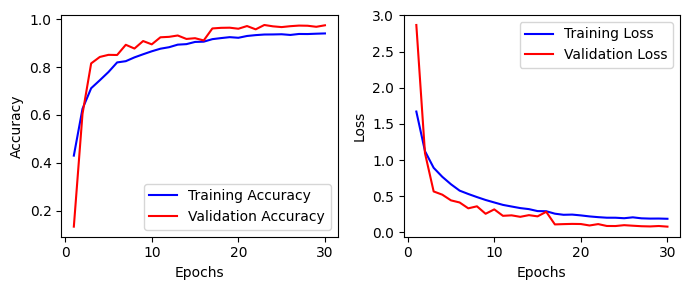

In [ ]:
import matplotlib.pyplot as plt

# Retrieve model training and validation metrics from the history object
acc2 = history.history['accuracy'] #training accuracy
val_acc = history.history['val_accuracy'] #validation accuracy
loss2 = history.history['loss'] #training loss
val_loss = history.history['val_loss'] #validation loss

# Define the range for epochs
epochs = range(1,len(acc2)+1)

# Plot training and validation accuracy on the first subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

# Plot training and validation accuracy on the first subplot
axes[0].plot(epochs, acc2, 'b', label='Training Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot training and validation loss on the second subplot
axes[1].plot(epochs, loss2, 'b', label='Training Loss')
axes[1].plot(epochs, val_loss, 'r', label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions on the test dataset
y_pred = cnn_model_2.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Get true labels from test_dataset
test_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Generate classification report with meaningful class names
report = classification_report(test_labels, y_pred_classes, target_names=class_names)
print(report)

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.97      0.99      0.98       214
                        Tomato_Early_blight       0.96      0.92      0.94       100
                         Tomato_Late_blight       0.94      0.97      0.96       191
                           Tomato_Leaf_Mold       0.99      0.99      0.99        96
                  Tomato_Septoria_leaf_spot       0.99      0.98      0.99       178
Tomato_Spider_mites_Two_spotted_spider_mite       0.94      0.98      0.96       169
                        Tomato__Target_Spot       1.00      0.93      0.96       141
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.99      0.97      0.98       321
                Tomato__Tomato_mosaic_virus       0.97      1.00      0.99        38
                             Tomato_healthy       0.98      1.00      0.99       159

                       

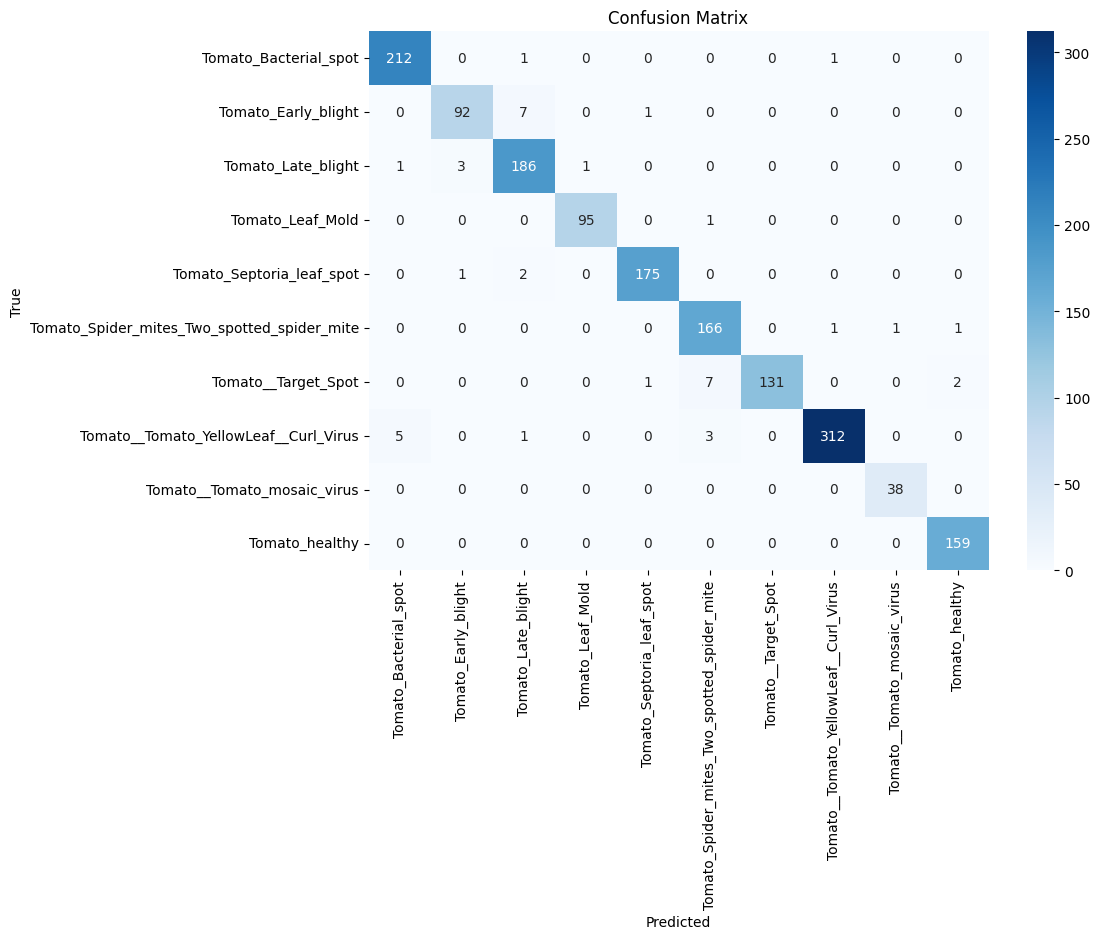

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


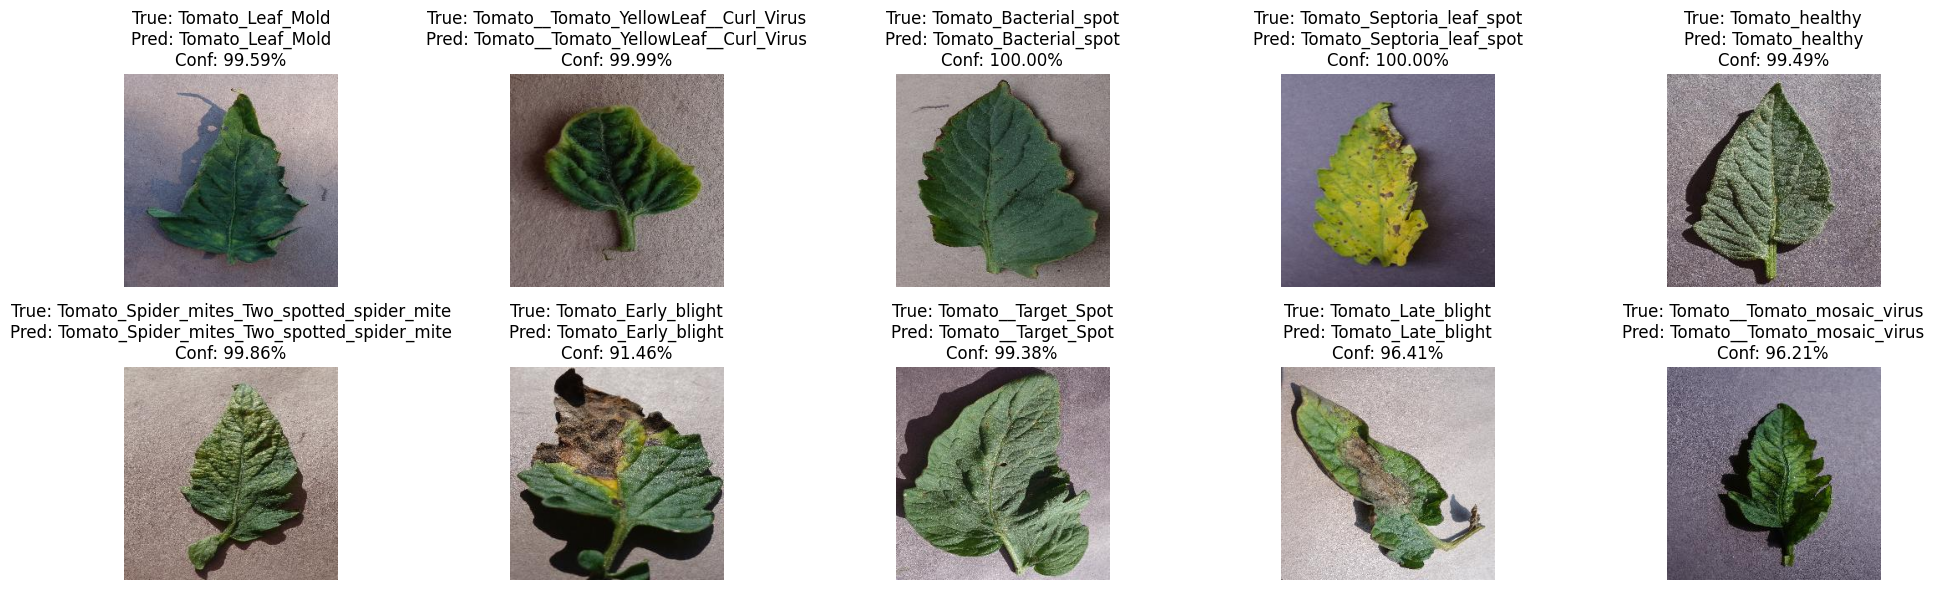

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img_size = 256,256

def sample_images_from_each_class(test_dir, img_size, num_images_per_class=1):
    selected_images = []
    class_names = os.listdir(test_dir)

    for class_name in class_names:
        class_path = os.path.join(test_dir, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            for _ in range(num_images_per_class):  # Sample a number of images per class
                random_image = random.choice(images)
                img_path = os.path.join(class_path, random_image)
                # Load the image
                img = image.load_img(img_path, target_size=img_size)
                img_array = image.img_to_array(img)
                img_array = image.img_to_array(img) / 255.0  # Normalize the image
                img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
                selected_images.append((img_path, img_array, class_name))

    return selected_images

# Use the function to sample images
sampled_images = sample_images_from_each_class(test_dir, IMG_SIZE, num_images_per_class=1)

# Set up the 2x5 grid for plotting
fig, axes = plt.subplots(2, 5, figsize=(20, 6))

for idx, (img_path, img_array, true_class_name) in enumerate(sampled_images):
    prediction = cnn_model_2.predict(img_array)
    # Get the predicted class index and confidence
    predicted_class_idx = np.argmax(prediction, axis=1)[0]  # Get the predicted class index
    predicted_class_name = class_names[predicted_class_idx]  # Get the class name for the predicted index
    confidence = np.max(prediction)  # Get the confidence score (maximum probability)

    # Plot the image
    ax = axes[idx // 5, idx % 5]
    img_to_display = image.load_img(img_path, target_size=img_size)
    ax.imshow(img_to_display)
    ax.axis('off')

    # Set title with prediction info
    ax.set_title(f"True: {true_class_name}\nPred: {predicted_class_name}\nConf: {confidence:.2%}")

# Display the plot
plt.tight_layout()
plt.show()

## Model 2: InceptionNetV3

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam

# Define input shape and number of classes
input_shape = (256, 256, 3) 
num_classes = 10 

def build_inceptionv3_model(input_shape, num_classes):
    # Load the InceptionV3 model with pre-trained ImageNet weights, excluding the top layers
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model layers

    # Use Functional API to add custom layers on top
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)

    return model

# Build the model
inception_model = build_inceptionv3_model(input_shape, num_classes)
optimizer = Adam(learning_rate=0.0001)

# Compile the model
inception_model.compile(optimizer=optimizer, 
                        loss='sparse_categorical_crossentropy', 
                        metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Display the model summary
inception_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 6, 6, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,066,346 (84.18 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model on the dataset
history = inception_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]  
)

Epoch 1/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 71s 162ms/step - accuracy: 0.1940 - loss: 2.2872 - val_accuracy: 0.6056 - val_loss: 1.4359 - learning_rate: 1.0000e-04
Epoch 2/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.4680 - loss: 1.5320 - val_accuracy: 0.6840 - val_loss: 1.0457 - learning_rate: 1.0000e-04
Epoch 3/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.5669 - loss: 1.2635 - val_accuracy: 0.7160 - val_loss: 0.9199 - learning_rate: 1.0000e-04
Epoch 4/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.6201 - loss: 1.1140 - val_accuracy: 0.7524 - val_loss: 0.8051 - learning_rate: 1.0000e-04
Epoch 5/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.6504 - loss: 1.0055 - val_accuracy: 0.7699 - val_loss: 0.7498 - learning_rate: 1.0000e-04
Epoch 6/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.6740 - loss: 0.9644 - val_accuracy: 0.7856 - val_loss: 0.7023 - learning_rate: 1.0000e-04
Epoch 7/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/st

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = inception_model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.8493 - loss: 0.4830
Test accuracy: 0.8562538623809814
Test loss: 0.45247164368629456


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate predictions for the test dataset
predictions = inception_model.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1)  # Get the predicted class labels
true_classes = tf.concat([y for x, y in test_dataset], axis=0)  # True labels from the test dataset

# Calculate precision, recall, and F1-score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step
Precision: 0.8597285070532713
Recall: 0.8562538892345987
F1 Score: 0.8567254212356631


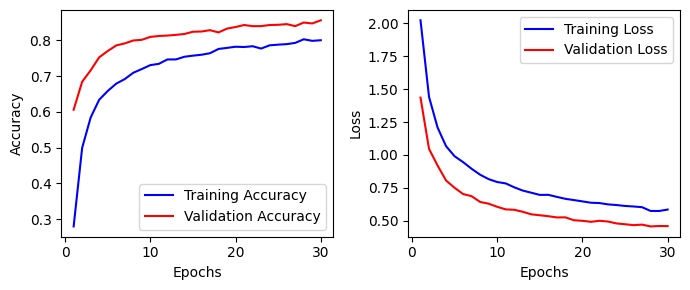

In [ ]:
import matplotlib.pyplot as plt

# Retrieve model training and validation metrics from the history object
acc2 = history.history['accuracy'] #training accuracy
val_acc = history.history['val_accuracy'] #validation accuracy
loss2 = history.history['loss'] #training loss
val_loss = history.history['val_loss'] #validation loss

# Define the range for epochs
epochs = range(1,len(acc2)+1)

# Plot training and validation accuracy on the first subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

# Plot training and validation accuracy on the first subplot
axes[0].plot(epochs, acc2, 'b', label='Training Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot training and validation loss on the second subplot
axes[1].plot(epochs, loss2, 'b', label='Training Loss')
axes[1].plot(epochs, val_loss, 'r', label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions on the test dataset
y_pred = inception_model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Get true labels from test_dataset
test_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Generate classification report with meaningful class names
report = classification_report(test_labels, y_pred_classes, target_names=class_names)
print(report)

51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.88      0.90      0.89       214
                        Tomato_Early_blight       0.77      0.72      0.75       100
                         Tomato_Late_blight       0.86      0.89      0.88       191
                           Tomato_Leaf_Mold       0.77      0.83      0.80        96
                  Tomato_Septoria_leaf_spot       0.86      0.76      0.81       178
Tomato_Spider_mites_Two_spotted_spider_mite       0.84      0.83      0.84       169
                        Tomato__Target_Spot       0.70      0.78      0.74       141
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.97      0.90      0.94       321
                Tomato__Tomato_mosaic_virus       0.76      0.92      0.83        38
                             Tomato_healthy       0.89      0.95      0.92       159

                       

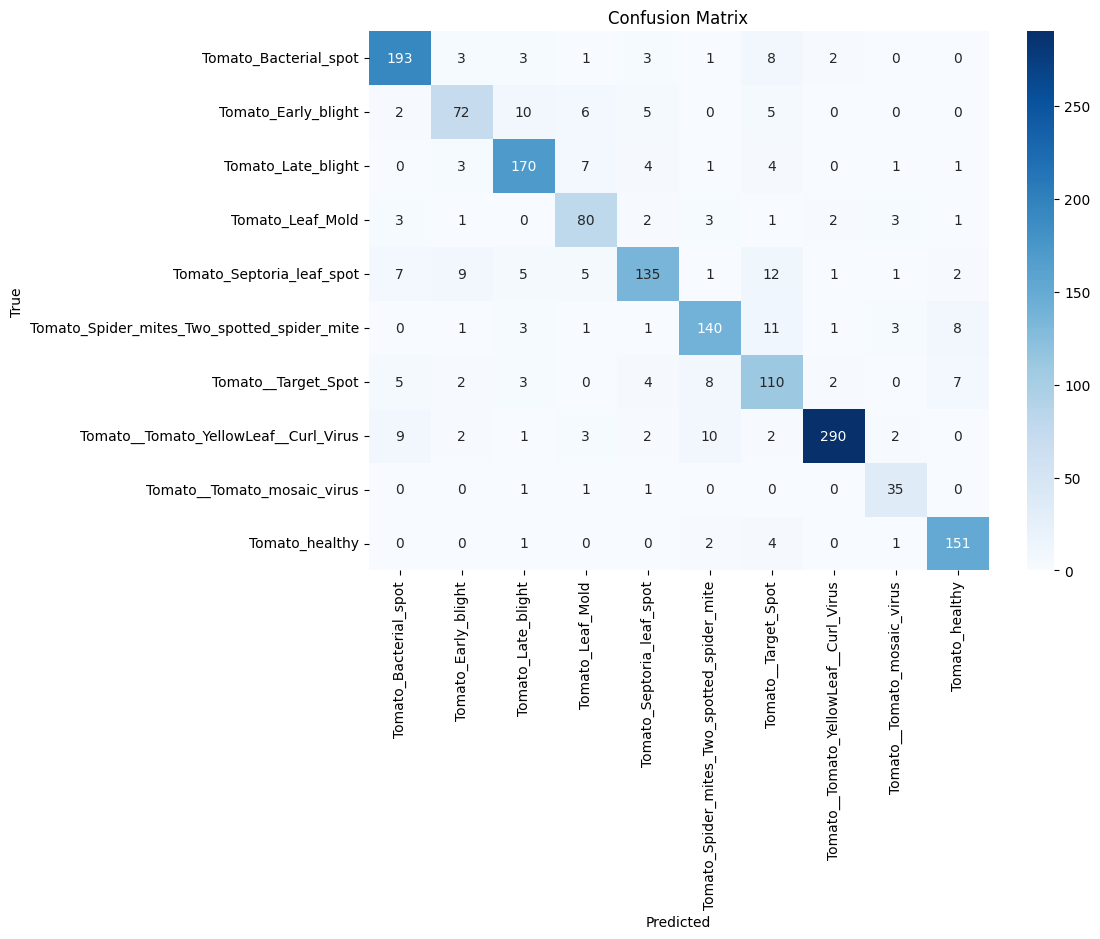

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Model 3: MobileNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_mobilenet_model(input_shape, num_classes):
    # Define input layer
    inputs = tf.keras.Input(shape=input_shape)

    # Load the MobileNet model with pre-trained ImageNet weights, excluding the top layer
    base_model = MobileNet(weights='imagenet', include_top=False, input_tensor=inputs)
    base_model.trainable = False  # Freeze the base model layers

    # Add custom layers on top
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)  # Add global average pooling layer
    x = layers.Dropout(0.5)(x)  # Dropout layer to prevent overfitting
    x = layers.Dense(128, activation='relu')(x)  # Fully connected layer
    x = layers.Dropout(0.3)(x)  # Additional dropout layer

    # Output layer with softmax activation for multi-class classification
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = models.Model(inputs=inputs, outputs=outputs)

    return model

# Build the model
mobilenet_model = build_mobilenet_model(input_shape, num_classes)

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.0001)

mobilenet_model.compile(optimizer=optimizer, 
                        loss='sparse_categorical_crossentropy', 
                        metrics=['accuracy'])

/tmp/ipykernel_30/1643882836.py:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_tensor=inputs)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Display the model summary
mobilenet_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 128, 128, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 128, 128, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 128, 128, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 64, 64, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 64, 64, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 64, 64, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 64, 64, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,361,354 (12.82 MB)

 Trainable params: 132,490 (517.54 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model on the dataset
history = mobilenet_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]  
)

Epoch 1/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.1957 - loss: 2.5265 - val_accuracy: 0.6658 - val_loss: 1.3760 - learning_rate: 1.0000e-04
Epoch 2/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.4442 - loss: 1.5878 - val_accuracy: 0.7611 - val_loss: 0.9238 - learning_rate: 1.0000e-04
Epoch 3/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5735 - loss: 1.2202 - val_accuracy: 0.7987 - val_loss: 0.7067 - learning_rate: 1.0000e-04
Epoch 4/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.6495 - loss: 1.0101 - val_accuracy: 0.8257 - val_loss: 0.6000 - learning_rate: 1.0000e-04
Epoch 5/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.6881 - loss: 0.9028 - val_accuracy: 0.8376 - val_loss: 0.5244 - learning_rate: 1.0000e-04
Epoch 6/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7111 - loss: 0.8349 - val_accuracy: 0.8545 - val_loss: 0.4803 - learning_rate: 1.0000e-04
Epoch 7/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/ste

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = mobilenet_model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy}')
print(f'Test accuracy: {test_loss}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9314 - loss: 0.2373
Test accuracy: 0.9334163069725037
Test accuracy: 0.21811771392822266


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate predictions for the test dataset
predictions = mobilenet_model.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1)  # Get the predicted class labels
true_classes = tf.concat([y for x, y in test_dataset], axis=0)  # True labels from the test dataset

# Calculate precision, recall, and F1-score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Precision: 0.9340874132075808
Recall: 0.9334163036714375
F1 Score: 0.9335406942682399


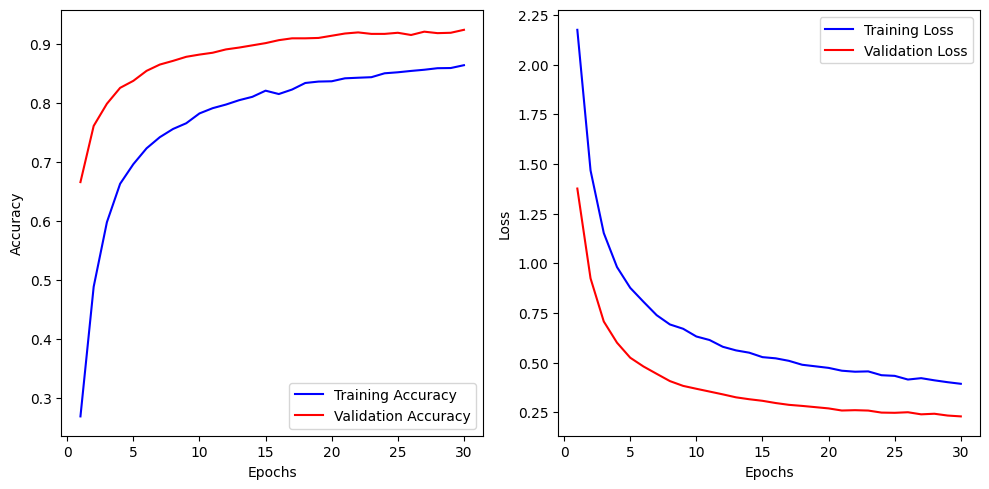

In [ ]:
import matplotlib.pyplot as plt

# Retrieve model training and validation metrics from the history object
acc2 = history.history['accuracy'] #training accuracy
val_acc = history.history['val_accuracy'] #validation accuracy
loss2 = history.history['loss'] #training loss
val_loss = history.history['val_loss'] #validation loss

# Define the range for epochs
epochs = range(1,len(acc2)+1)

# Plot training and validation accuracy on the first subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

# Plot training and validation accuracy on the first subplot
axes[0].plot(epochs, acc2, 'b', label='Training Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot training and validation loss on the second subplot
axes[1].plot(epochs, loss2, 'b', label='Training Loss')
axes[1].plot(epochs, val_loss, 'r', label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions on the test dataset
y_pred = mobilenet_model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Get true labels from test_dataset
test_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Generate classification report with meaningful class names
report = classification_report(test_labels, y_pred_classes, target_names=class_names)
print(report)

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.91      0.96      0.94       214
                        Tomato_Early_blight       0.89      0.87      0.88       100
                         Tomato_Late_blight       0.94      0.93      0.94       191
                           Tomato_Leaf_Mold       0.89      0.89      0.89        96
                  Tomato_Septoria_leaf_spot       0.92      0.90      0.91       178
Tomato_Spider_mites_Two_spotted_spider_mite       0.92      0.93      0.93       169
                        Tomato__Target_Spot       0.88      0.89      0.88       141
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.99      0.95      0.97       321
                Tomato__Tomato_mosaic_virus       0.90      0.95      0.92        38
                             Tomato_healthy       0.99      0.99      0.99       159

                       

## Model 4: ViT

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Define the Vision Transformer parameters
image_size = 256  # Input image size
patch_size = 16  # Patch size
num_patches = (image_size // patch_size) ** 2  # Total patches
projection_dim = 64  # Dimension of the embedding space
num_heads = 4  # Number of attention heads
transformer_units = [projection_dim * 2, projection_dim]  # Feed-forward network units
num_transformer_blocks = 8  # Number of transformer blocks
mlp_head_units = 128  # Number of units in the final MLP head


# Helper functions for creating patches and patch embedding
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )

        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patches):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patches) + self.position_embedding(positions)
        return encoded

In [ ]:
# Vision Transformer Model
def create_vit_classifier(input_shape=(256, 256, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)

    # Create patches
    patches = Patches(patch_size)(inputs)

    # Encode patches
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple transformer blocks
    for _ in range(num_transformer_blocks):
        # Layer normalization and multi-head attention
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)

        # Skip connection
        x2 = layers.Add()([attention_output, encoded_patches])

        # Layer normalization and feed-forward network
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(units=transformer_units[0], activation="relu")(x3)
        x3 = layers.Dense(units=transformer_units[1], activation="relu")(x3)

        # Skip connection
        encoded_patches = layers.Add()([x3, x2])

    # Classification head
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.GlobalAveragePooling1D()(representation)
    representation = layers.Dense(mlp_head_units, activation="relu")(representation)
    representation = layers.Dropout(0.5)(representation)
    logits = layers.Dense(num_classes, activation="softmax")(representation)

    # Define the model
    model = models.Model(inputs=inputs, outputs=logits)
    return model

# Create the Vision Transformer model
vit_model = create_vit_classifier(input_shape=input_shape, num_classes=num_classes)

# Compile the model
vit_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]

)

In [ ]:
# Display model summary
vit_model.summary()

Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches (Patches)   │ (None, None, 768) │          0 │ input_layer_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, 256, 64)   │     65,600 │ patches[0][0]     │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 256, 64)   │        128 │ patch_encoder[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 256, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 256, 64)   │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 256, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 256, 64)   │      8,256 │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 256, 64)   │          0 │ dense_23[0][0],   │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 256, 64)   │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 256, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 256, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 256, 64)   │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 256, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 256, 64)   │      8,256 │ dense_24[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 256, 64)   │          0 │ dense_25[0][0],   │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 256, 64)   │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 740,938 (2.83 MB)

 Trainable params: 740,938 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model

history = vit_model.fit(train_dataset, 
                          validation_data=val_dataset, 
                          epochs=30, 
                          batch_size=batch_size,
                          callbacks=[early_stopping, reduce_lr])

Epoch 1/30


I0000 00:00:1730824696.226699   10917 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_317', 256 bytes spill stores, 256 bytes spill loads



311/312 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1371 - loss: 2.3050

I0000 00:00:1730824740.978267   10940 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_317', 256 bytes spill stores, 256 bytes spill loads



312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.1372 - loss: 2.3046

I0000 00:00:1730824763.731673   10985 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_58', 256 bytes spill stores, 256 bytes spill loads



312/312 ━━━━━━━━━━━━━━━━━━━━ 105s 186ms/step - accuracy: 0.1374 - loss: 2.3042 - val_accuracy: 0.2470 - val_loss: 1.9412 - learning_rate: 0.0010
Epoch 2/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.3187 - loss: 1.8201 - val_accuracy: 0.4715 - val_loss: 1.4101 - learning_rate: 0.0010
Epoch 3/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.5288 - loss: 1.3474 - val_accuracy: 0.6727 - val_loss: 0.9315 - learning_rate: 0.0010
Epoch 4/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.7034 - loss: 0.8662 - val_accuracy: 0.6671 - val_loss: 0.9395 - learning_rate: 0.0010
Epoch 5/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.7498 - loss: 0.7121 - val_accuracy: 0.7066 - val_loss: 0.9239 - learning_rate: 0.0010
Epoch 6/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8022 - loss: 0.5973 - val_accuracy: 0.8621 - val_loss: 0.4058 - learning_rate: 0.0010
Epoch 7/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.8503 - loss: 0.44

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = vit_model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

50/51 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9491 - loss: 0.1734

I0000 00:00:1730825413.819237   11459 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_58', 256 bytes spill stores, 256 bytes spill loads



51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.9495 - loss: 0.1728
Test accuracy: 0.9589296579360962
Test loss: 0.15622641146183014


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions on the test dataset
y_pred = vit_model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Get true labels from test_dataset
test_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Generate classification report with meaningful class names
report = classification_report(test_labels, y_pred_classes, target_names=class_names)
print(report)

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.96      0.94      0.95       214
                        Tomato_Early_blight       0.94      0.94      0.94       100
                         Tomato_Late_blight       0.95      0.95      0.95       191
                           Tomato_Leaf_Mold       0.97      0.98      0.97        96
                  Tomato_Septoria_leaf_spot       0.97      0.98      0.97       178
Tomato_Spider_mites_Two_spotted_spider_mite       0.93      0.93      0.93       169
                        Tomato__Target_Spot       0.93      0.96      0.95       141
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.97      0.96      0.97       321
                Tomato__Tomato_mosaic_virus       0.93      1.00      0.96        38
                             Tomato_healthy       0.99      1.00      1.00       159

                       

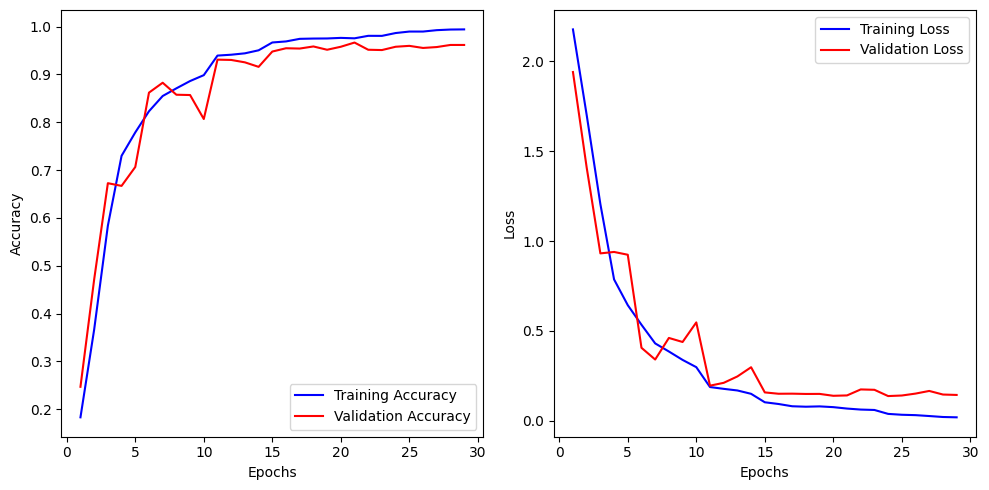

In [ ]:
import matplotlib.pyplot as plt

# Retrieve model training and validation metrics from the history object
acc2 = history.history['accuracy'] #training accuracy
val_acc = history.history['val_accuracy'] #validation accuracy
loss2 = history.history['loss'] #training loss
val_loss = history.history['val_loss'] #validation loss

# Define the range for epochs
epochs = range(1,len(acc2)+1)

# Plot training and validation accuracy on the first subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

# Plot training and validation accuracy on the first subplot
axes[0].plot(epochs, acc2, 'b', label='Training Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot training and validation loss on the second subplot
axes[1].plot(epochs, loss2, 'b', label='Training Loss')
axes[1].plot(epochs, val_loss, 'r', label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

## Model 5: SA-CNN

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the Self-Attention Convolutional Neural Network (SA-CNN) model
def build_sacnn_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Convolutional Block 1
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    # Convolutional Block 2
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Convolutional Block 3
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Self-Attention Layer
    attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=128)(x, x)
    x = layers.Add()([x, attention_output])  # Residual connection

    # Fully Connected Layer
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation="relu")(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Initialize and compile the model
sa_cnn_model_2 = build_sacnn_model(input_shape, num_classes)
# Compile the model
optimizer = optimizers.Adam(learning_rate=0.0001)
sa_cnn_model_2.compile(
    optimizer=optimizer, 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)

In [13]:
# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)
# Train the model on the dataset
history = sa_cnn_model_2.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    callbacks=[early_stopping, reduce_lr],
)

Epoch 1/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 66s 195ms/step - accuracy: 0.1433 - loss: 2.2241 - val_accuracy: 0.3392 - val_loss: 1.7232 - learning_rate: 1.0000e-04
Epoch 2/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 57s 184ms/step - accuracy: 0.3924 - loss: 1.6239 - val_accuracy: 0.4721 - val_loss: 1.4602 - learning_rate: 1.0000e-04
Epoch 3/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 57s 184ms/step - accuracy: 0.4942 - loss: 1.3859 - val_accuracy: 0.5392 - val_loss: 1.2844 - learning_rate: 1.0000e-04
Epoch 4/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 58s 185ms/step - accuracy: 0.5702 - loss: 1.2055 - val_accuracy: 0.6088 - val_loss: 1.0978 - learning_rate: 1.0000e-04
Epoch 5/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 59s 188ms/step - accuracy: 0.6266 - loss: 1.0540 - val_accuracy: 0.6715 - val_loss: 0.9469 - learning_rate: 1.0000e-04
Epoch 6/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 57s 184ms/step - accuracy: 0.6874 - loss: 0.8924 - val_accuracy: 0.6803 - val_loss: 0.9071 - learning_rate: 1.0000e-04
Epoch 7/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 58s 18

In [14]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = sa_cnn_model_2.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

50/51 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8840 - loss: 0.3428

I0000 00:00:1731931440.941503    1469 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_7', 788 bytes spill stores, 784 bytes spill loads



51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 253ms/step - accuracy: 0.8840 - loss: 0.3429
Test accuracy: 0.883634090423584
Test loss: 0.3440828323364258


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Generate predictions for the test dataset
predictions = sa_cnn_model_2.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1)  # Get the predicted class labels
true_classes = tf.concat(
    [y for x, y in test_dataset], axis=0
)  # True labels from the test dataset
# Calculate precision, recall, and F1-score
precision = precision_score(true_classes, predicted_classes, average="weighted")
recall = recall_score(true_classes, predicted_classes, average="weighted")
f1 = f1_score(true_classes, predicted_classes, average="weighted")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step
Precision: 0.8869810668490952
Recall: 0.8836341008089608
F1 Score: 0.8831436223054462


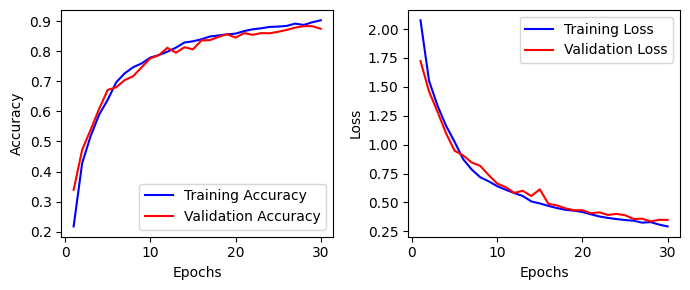

In [16]:
import matplotlib.pyplot as plt
acc2 = history.history["accuracy"]  # training accuracy
val_acc = history.history["val_accuracy"]  # validation accuracy
loss2 = history.history["loss"]  # training loss
val_loss = history.history["val_loss"]  # validation loss
epochs = range(1, len(acc2) + 1)
# creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
# plot training and validation accuracy
axes[0].plot(epochs, acc2, "b", label="Training Accuracy")
axes[0].plot(epochs, val_acc, "r", label="Validation Accuracy")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].legend()
axes[1].plot(epochs, loss2, "b", label="Training Loss")
axes[1].plot(epochs, val_loss, "r", label="Validation Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()
plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import classification_report
import numpy as np
# Make predictions on the test dataset
y_pred = sa_cnn_model_2.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
# Get true labels from test_dataset
test_labels = np.concatenate([y for x, y in test_dataset], axis=0)
# Generate classification report with meaningful class names
report = classification_report(test_labels, y_pred_classes, target_names=class_names)
print(report)

51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.86      0.96      0.91       214
                        Tomato_Early_blight       0.78      0.72      0.75       100
                         Tomato_Late_blight       0.86      0.84      0.85       191
                           Tomato_Leaf_Mold       0.79      0.92      0.85        96
                  Tomato_Septoria_leaf_spot       0.93      0.80      0.86       178
Tomato_Spider_mites_Two_spotted_spider_mite       0.87      0.88      0.87       169
                        Tomato__Target_Spot       0.84      0.94      0.89       141
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.97      0.87      0.92       321
                Tomato__Tomato_mosaic_virus       0.86      0.95      0.90        38
                             Tomato_healthy       0.93      0.99      0.96       159

                       

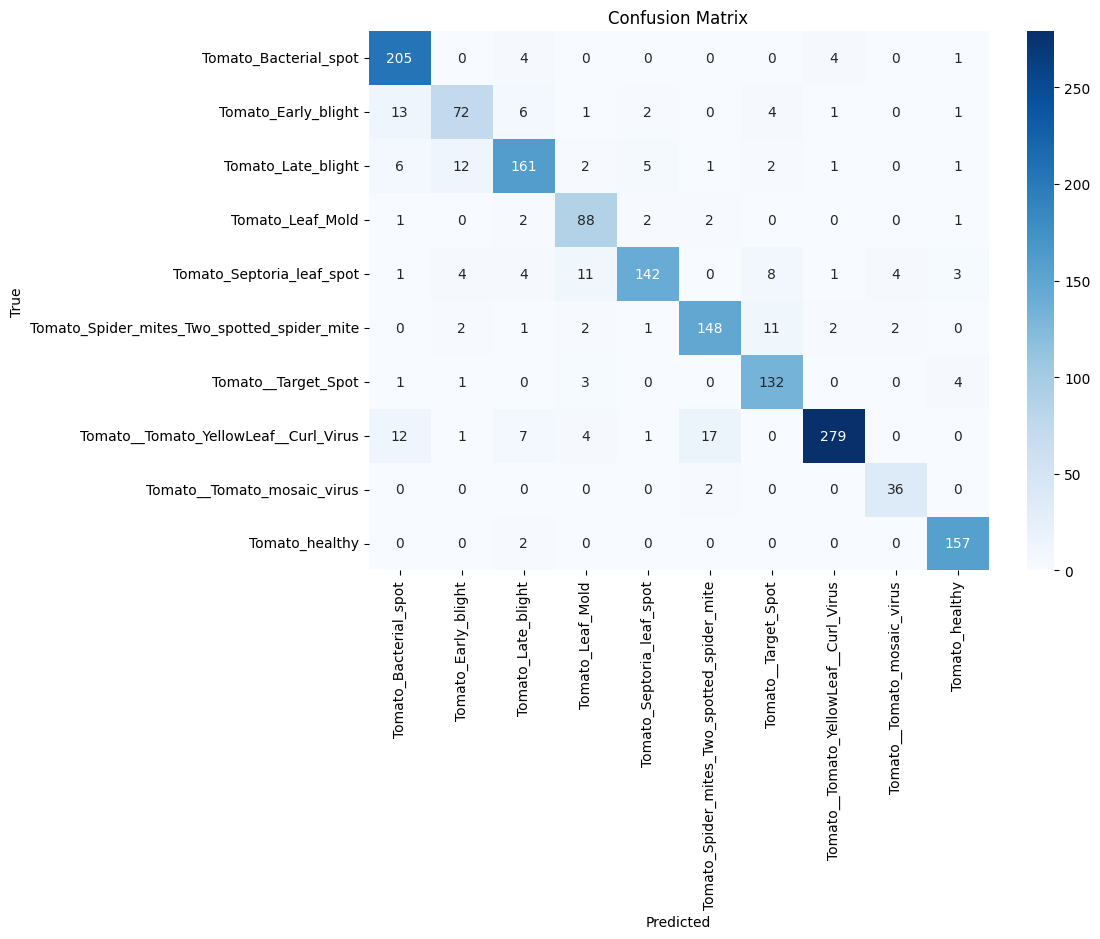

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_classes)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np



def evaluate_model(model, test_dataset):

    # Get predictions and true labels

    predictions = model.predict(test_dataset)

    predicted_labels = np.argmax(predictions, axis=1)

    true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

    

    # Calculate metrics

    accuracy = accuracy_score(true_labels, predicted_labels)

    precision = precision_score(true_labels, predicted_labels, average='weighted')

    recall = recall_score(true_labels, predicted_labels, average='weighted')

    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    

    return accuracy, precision, recall, f1

In [86]:
# Evaluate each model

cnn_accuracy, cnn_precision, cnn_recall, cnn_f1 = evaluate_model(cnn_model_tuning, test_dataset)

vit_accuracy, vit_precision, vit_recall, vit_f1 = evaluate_model(vit_model, test_dataset)

mobilenet_accuracy, mobilenet_precision, mobilenet_recall, mobilenet_f1 = evaluate_model(mobilenet_model, test_dataset)

inception_accuracy, inception_precision, inception_recall, inception_f1 = evaluate_model(inception_model, test_dataset)

51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step


In [87]:
import pandas as pd



# Create a DataFrame to summarize the results

results = pd.DataFrame({

    "Model": ["CNN", "ViT", "MobileNet", "Inception"],

    "Accuracy": [cnn_accuracy, vit_accuracy, mobilenet_accuracy, inception_accuracy],

    "Precision": [cnn_precision, vit_precision, mobilenet_precision, inception_precision],

    "Recall": [cnn_recall, vit_recall, mobilenet_recall, inception_recall],

    "F1 Score": [cnn_f1, vit_f1, mobilenet_f1, inception_f1]

})



# Display the results

print(results)

       Model  Accuracy  Precision    Recall  F1 Score
0        CNN  0.981954   0.982131  0.981954  0.981983
1        ViT  0.958930   0.959089  0.958930  0.958910
2  MobileNet  0.933416   0.934087  0.933416  0.933541
3  Inception  0.856254   0.859729  0.856254  0.856725
